In [1]:
import tweepy
import json
from pymongo import MongoClient
from collections import Counter
import logging
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import community
import seaborn as sns
from fastprogress import master_bar, progress_bar

#Logger
logging.basicConfig(filename='Methodology.log', format='%(asctime)s - %(name)s - %(levelname)s - %(message)s', datefmt='%m/%d/%Y %I:%M:%S %p', level=logging.INFO)
ch = logging.StreamHandler()
ch.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
ch.setFormatter(formatter)
logging.getLogger().addHandler(ch)

In [3]:
################
# RESTART DATA #
################

H = nx.read_gml("Cat-CI-Complete.gml")

print("Nombre de nodes: {}".format(H.number_of_nodes()))
print("Nombre d'arestes: {}".format(H.number_of_edges()))

with open('Cat-community_dict.json', 'r') as fp:
    community_dict = json.load(fp)
    
len(community_dict)

Nombre de nodes: 138518
Nombre d'arestes: 843546


138518

In [4]:
H.remove_edges_from(nx.selfloop_edges(H))
print("Nombre de nodes: {}".format(H.number_of_nodes()))
print("Nombre d'arestes: {}".format(H.number_of_edges()))

H = nx.k_core(H, k=30)

print("Nombre de nodes: {}".format(H.number_of_nodes()))
print("Nombre d'arestes: {}".format(H.number_of_edges()))

Nombre de nodes: 138518
Nombre d'arestes: 841270
Nombre de nodes: 7047
Nombre d'arestes: 311232


In [5]:
############################
# FORCE ATLAS 2            #
############################

from fa2 import ForceAtlas2

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(H, pos=None, iterations=500)

100%|██████████| 500/500 [02:09<00:00,  3.86it/s]

BarnesHut Approximation  took  36.21  seconds
Repulsion forces  took  86.71  seconds
Gravitational forces  took  0.22  seconds
Attraction forces  took  3.27  seconds
AdjustSpeedAndApplyForces step  took  1.27  seconds


In [7]:
for i in range (20):
    print("STEP: " + str(i))
    positions = forceatlas2.forceatlas2_networkx_layout(H, pos=None, iterations=500)
    print(positions["vox_es"])
    if positions["vox_es"][0] > 3500:
        break

STEP: 0


100%|██████████| 500/500 [02:16<00:00,  3.66it/s]


BarnesHut Approximation  took  36.65  seconds
Repulsion forces  took  93.24  seconds
Gravitational forces  took  0.22  seconds
Attraction forces  took  3.33  seconds
AdjustSpeedAndApplyForces step  took  1.27  seconds
(-861.7978639873232, 4280.967580996993)
STEP: 1


100%|██████████| 500/500 [02:15<00:00,  3.69it/s]

BarnesHut Approximation  took  36.97  seconds
Repulsion forces  took  91.61  seconds
Gravitational forces  took  0.22  seconds
Attraction forces  took  3.37  seconds
AdjustSpeedAndApplyForces step  took  1.26  seconds
(4218.096441160445, -2162.888093999549)


In [9]:
########################
# SAVE FA2 POSITIONS   #
########################

print(positions)

with open('Cat-fa2_positions_dict.json', 'w') as fp:
    json.dump(positions, fp)

{'nataliamasguix': (-2563.296661439715, 790.277457463252), 'Paelarrastre': (3912.2207577282347, -1983.5028482612402), 'TXIKI39644970': (-2605.098462014917, 2141.280854099229), 'OvisLupus': (-2832.5259344765927, 2175.7264470746413), 'DrizztD_Urden': (3761.4077866741527, -1934.4670846409426), 'VicentVG': (-685.9851435597157, -2201.338011821379), 'SusannaEscriba': (-3300.533441419425, 2301.336105393581), 'aterea5': (3745.5804043822077, -1918.5123394983907), 'barnaem': (-3200.1337809099377, 2196.5532629241125), 'Lola21811642': (-3106.276157211377, 2764.232519023171), 'SergiSarri': (-2838.096247242517, 2015.5666170302406), 'querolnuria': (-2378.7488984972874, 842.8030355653251), 'iniesta194827': (3636.455563565028, -1825.1966421240475), 'PSCLH': (-738.7533209617202, -2093.319693297899), 'sarabailac': (-2507.493565620204, 642.1016338225246), 'JuanjoAizcorbe': (4204.151914042654, -2129.0397607084633), 'BalaschRue': (-2973.649944641683, 2229.2757047601012), 'kikorron9': (4124.8427234272185, -1

In [5]:
########################
# READ FA2 POSITIONS   #
########################

with open('Cat-fa2_positions_dict.json', 'r') as fp:
    positions = json.load(fp)       

print(len(positions))
print(positions)

7047
{'nataliamasguix': [-2563.296661439715, 790.277457463252], 'Paelarrastre': [3912.2207577282347, -1983.5028482612402], 'TXIKI39644970': [-2605.098462014917, 2141.280854099229], 'OvisLupus': [-2832.5259344765927, 2175.7264470746413], 'DrizztD_Urden': [3761.4077866741527, -1934.4670846409426], 'VicentVG': [-685.9851435597157, -2201.338011821379], 'SusannaEscriba': [-3300.533441419425, 2301.336105393581], 'aterea5': [3745.5804043822077, -1918.5123394983907], 'barnaem': [-3200.1337809099377, 2196.5532629241125], 'Lola21811642': [-3106.276157211377, 2764.232519023171], 'SergiSarri': [-2838.096247242517, 2015.5666170302406], 'querolnuria': [-2378.7488984972874, 842.8030355653251], 'iniesta194827': [3636.455563565028, -1825.1966421240475], 'PSCLH': [-738.7533209617202, -2093.319693297899], 'sarabailac': [-2507.493565620204, 642.1016338225246], 'JuanjoAizcorbe': [4204.151914042654, -2129.0397607084633], 'BalaschRue': [-2973.649944641683, 2229.2757047601012], 'kikorron9': [4124.842723427218

EnComu_Podem
[-948.5644884787172, -115.95889810347397]
JuntsXCat
[-3216.493750396224, 2204.0702329508163]
populares
[2828.9019359660965, -1625.3310235489123]
Esquerra_ERC
[-2480.290453785793, 698.1647791740883]
CiudadanosCs
[3031.0484634187123, -1073.6407628349054]
vox_es
[4218.096441160445, -2162.888093999549]
socialistes_cat
[-653.6399621301462, -2195.8624270604473]
cupnacional
[-2300.223933550774, 1805.4471257574473]


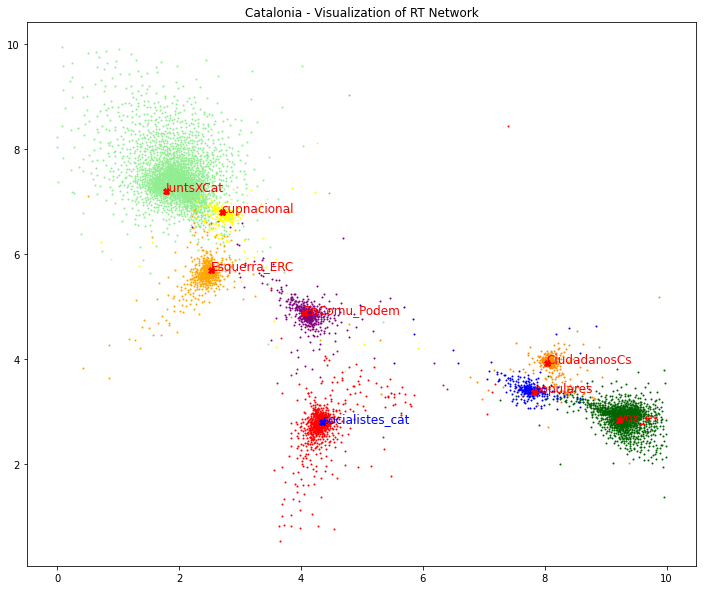

In [8]:
#################################
# VISUALIZE (WIH PARTY NAMES)   #
#################################

COMMUNITIES_LIST = ["VOX", "JXCAT", "CUP", "COMUNS", "PSC", "ERC", "PP", "CS"]
#COMMUNITIES_LIST = ["VOX", "POR_AND", "PSOE", "PP", "ADELANTE_AND", "CS"]
#COMMUNITIES_LIST = ["VOX", "PODEMOS", "PSOE", "PP", "MAS_MAD", "CS"]

COLORS_LIST = ["darkgreen", "lightgreen", "yellow", "purple", "red", "orange", "blue", "darkorange"]

def community_color(node_name):
    community = community_dict[node_name]
    index = COMMUNITIES_LIST.index(community)
    color = COLORS_LIST[index]
    return color

def scale_position(position):
    scaled_position = position/1000 + 5
    return scaled_position

# Visualize embeddings in 2D space with node labels
plt.figure(figsize=(12, 10))
#plt.scatter(embedding[:, 0], embedding[:, 1], s=1)
#plt.scatter(positions.values(), c='blue', alpha=0.7)


'''
#Only label top10 in-degree nodes
indeg = G.in_degree(weight='weight')
sorted_indeg = sorted(indeg, key=lambda i: i[1], reverse=True)[:10]
print("Usuaris amb més grau d'ENTRADA:")
print(sorted_indeg)
sorted_indeg_names = [i[0] for i in sorted_indeg]
'''

ideological_position_dict ={}

# Add node labels
#party_names = ['vox_es', 'PSOE', 'populares', 'PODEMOS', 'EnComu_Podem', 'CiudadanosCs', 
#               'socialistes_cat', 'Esquerra_ERC', 'JuntsXCat', 'cupnacional']
party_names = ['vox_es', 'populares', 'EnComu_Podem', 'CiudadanosCs', 'socialistes_cat', 
               'Esquerra_ERC', 'JuntsXCat', 'cupnacional']
for node_name, position in positions.items():
    if position[0]<5000 and position [0]>-5000:
        if position[1]<5000 and position [1]>-5000:
            #plt.scatter(position[0], position[1], c='blue', s=1)
            plt.scatter(scale_position(position[0]), scale_position(position[1]), c=community_color(node_name), s=1)
            if node_name in party_names:
                print(node_name)
                print(position)
                ideological_position_dict [node_name] = [scale_position(position[0]), scale_position(position[1])]
                #plt.plot(position[0], position[1], c='green', marker="X")
                #plt.text(position[0], position[1], node_name, fontsize=8, c='red')
                if node_name == 'socialistes_cat':
                    plt.text(scale_position(position[0]), scale_position(position[1]), node_name, fontsize=12, c='blue')
                    plt.plot(scale_position(position[0]), scale_position(position[1]), c='blue', marker="X")
                else:
                    plt.text(scale_position(position[0]), scale_position(position[1]), node_name, fontsize=12, c='red')
                    plt.plot(scale_position(position[0]), scale_position(position[1]), c='red', marker="X")
        

#plt.xlabel('X Dimension')
#plt.xlabel('Y Dimension')
plt.title('Catalonia - Visualization of RT Network')
#plt.savefig("CAT-PARTIES.png")
plt.show()

In [11]:
print(ideological_position_dict)

{'PSOE': [4.310048262560152, 2.8121461461804773], 'PODEMOS': [4.045784088417165, 4.902327996569042], 'EnComu_Podem': [4.051435511521283, 4.884041101896526], 'JuntsXCat': [1.783506249603776, 7.204070232950816], 'populares': [7.828901935966097, 3.3746689764510878], 'Esquerra_ERC': [2.519709546214207, 5.698164779174088], 'CiudadanosCs': [8.031048463418713, 3.9263592371650944], 'vox_es': [9.218096441160444, 2.8371119060004513], 'socialistes_cat': [4.346360037869854, 2.8041375729395526], 'cupnacional': [2.699776066449226, 6.805447125757447]}


mariadolorsa
[-1266.3041320384832, -1897.8978594078358]
perearagones
[-590.3551385192361, -1393.5038101837977]
LauraBorras
[-1236.3187139837364, -3077.052116995477]
salvadorilla
[-2153.4552431430257, 1895.882448765945]
carrizosacarlos
[1675.2707699665027, 3291.753980183583]
alejandroTGN
[2369.9211868428356, 2881.764154354475]
Igarrigavaz
[3329.384982279815, 3586.7894627342002]
jessicaalbiach
[-1672.3210141607403, 184.40577592893686]


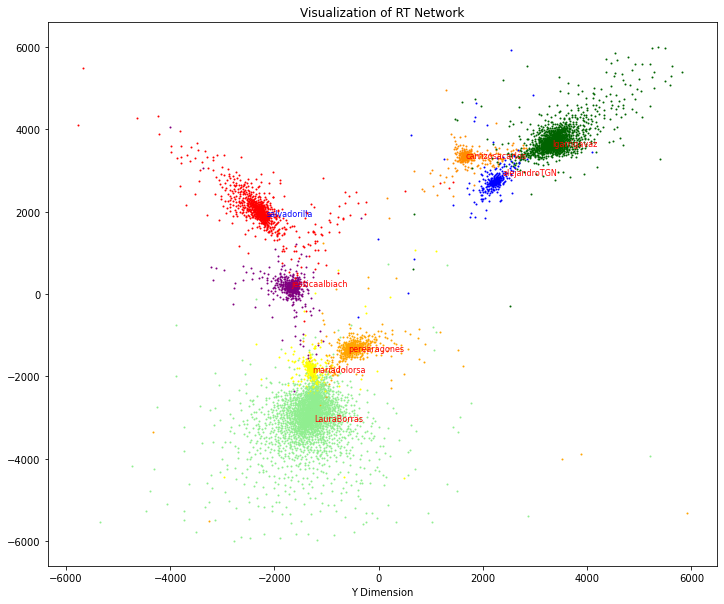

In [5]:
#################################
# VISUALIZE (WIH CANDIDATES NAMES)   #
#################################

COMMUNITIES_LIST = ["VOX", "JXCAT", "CUP", "COMUNS", "PSC", "ERC", "PP", "CS"]
COLORS_LIST = ["darkgreen", "lightgreen", "yellow", "purple", "red", "orange", "blue", "darkorange"]

def community_color(node_name):
    community = community_dict[node_name]
    index = COMMUNITIES_LIST.index(community)
    color = COLORS_LIST[index]
    return color

# Visualize embeddings in 2D space with node labels
plt.figure(figsize=(12, 10))
#plt.scatter(embedding[:, 0], embedding[:, 1], s=1)
#plt.scatter(positions.values(), c='blue', alpha=0.7)


'''
#Only label top10 in-degree nodes
indeg = G.in_degree(weight='weight')
sorted_indeg = sorted(indeg, key=lambda i: i[1], reverse=True)[:10]
print("Usuaris amb més grau d'ENTRADA:")
print(sorted_indeg)
sorted_indeg_names = [i[0] for i in sorted_indeg]
'''

# Add node labels
candidate_names = ['Igarrigavaz', 'LauraBorras', 'mariadolorsa', 'jessicaalbiach', 
                   'salvadorilla', 'perearagones', 'alejandroTGN', 'carrizosacarlos']
for node_name, position in positions.items():
    if position[0]<6000 and position [0]>-6000:
        if position[1]<6000 and position [1]>-6000:
            #plt.scatter(position[0], position[1], c='blue', s=1)
            plt.scatter(position[0], position[1], c=community_color(node_name), s=1)
            if node_name in candidate_names:
                print(node_name)
                print(position)
                #plt.plot(position[0], position[1], c='green', marker="X")
                #plt.text(position[0], position[1], node_name, fontsize=8, c='red')
                if node_name == 'salvadorilla':
                    plt.text(position[0], position[1], node_name, fontsize=8, c='blue')
                else:
                    plt.text(position[0], position[1], node_name, fontsize=8, c='red')
                

plt.xlabel('X Dimension')
plt.xlabel('Y Dimension')
plt.title('Visualization of RT Network')
#plt.savefig("CAT-CANDIDATES.png")
plt.show()

In [12]:
###############################
# SAVE IDEOLOGICAL POSITION   #
###############################

print(ideological_position_dict)

with open('Cat-ideological_position_dict.json', 'w') as fp:
    json.dump(ideological_position_dict, fp)

{'PSOE': [4.310048262560152, 2.8121461461804773], 'PODEMOS': [4.045784088417165, 4.902327996569042], 'EnComu_Podem': [4.051435511521283, 4.884041101896526], 'JuntsXCat': [1.783506249603776, 7.204070232950816], 'populares': [7.828901935966097, 3.3746689764510878], 'Esquerra_ERC': [2.519709546214207, 5.698164779174088], 'CiudadanosCs': [8.031048463418713, 3.9263592371650944], 'vox_es': [9.218096441160444, 2.8371119060004513], 'socialistes_cat': [4.346360037869854, 2.8041375729395526], 'cupnacional': [2.699776066449226, 6.805447125757447]}
